In [ ]:
# Uses NAB survey data to forecast "S&P/ASX 200(TR)m". Generating and evaluating predictions

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from pathlib import Path

%matplotlib inline


In [2]:
data = Path("C:/Users/Nick Hugh/Repos/Project 3/Nick Hugh Data/Australian_Data_Mod.xlsx")
source_df = pd.read_excel(data, index_col="date", parse_dates=True)
source_df

,ASX Small Ords Accum (Ex 100),Energy,Materials,Telecomm Services,S&P/ASX 200(TR)m,Property Trusts,Capital Goods,AU NAB Business Confidence,AU NAB Business Conditions,AU NAB Trading Conditions,...,AU Westpac-MI Consumer Sentiment Index - Buy major HH item,AU Westpac-MI Consumer Sentiment Index - Family Finances now,AU Westpac-MI Consumer Sentiment Index - Family Finances 1yr,AU Westpac-MI Consumer Sentiment Index - Economic Conditions 1yr,AU Westpac-MI Consumer Sentiment Index - Economic Conditions 5yr,Aus Employment to Population Ratio,Aus Employed (Part time),WBC Consumer Economic Conditions 5yr - 1yr,WBC WBC Consumer Sentiment Time to buy a House,Aust Underemployment rate
date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,3141.30,16693.55,17563.95,13810.87,14483.04,12867.80,17246.59,8.7,16.7,28.0,...,130.2,97.1,103.9,101.8,96.0,58.86,2297.10,-5.8,150.10,6.36
2000-01-31,2953.20,16796.70,16166.90,13588.80,14313.58,12558.10,16490.44,9.0,9.0,19.0,...,133.0,98.9,106.1,109.9,100.3,58.46,2283.43,-9.6,148.30,6.38
2000-02-29,3018.60,14229.12,14172.92,14218.60,14569.27,13376.40,14852.63,-2.9,9.3,17.0,...,132.8,93.7,99.9,92.5,91.9,58.71,2313.12,-0.6,146.50,6.44
2000-03-31,2985.70,14690.04,14690.04,14690.04,14690.04,13376.95,14690.04,6.8,8.8,17.3,...,134.6,97.4,99.9,90.0,92.4,58.95,2315.59,2.4,144.70,5.74
2000-04-30,2644.30,15139.94,15212.09,13177.10,14613.10,13633.00,15945.68,-0.6,5.2,11.4,...,133.2,90.3,94.1,83.6,91.3,59.14,2339.12,7.7,136.57,5.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,9351.06,95479.09,153569.08,24746.10,82028.33,59705.06,27728.08,3.4,24.9,32.2,...,88.8,72.0,86.2,80.3,91.6,64.18,4174.25,11.3,80.10,6.05
2022-08-31,9405.07,102933.49,160251.19,25376.71,82992.41,57587.22,28204.48,6.1,21.4,28.5,...,81.4,72.1,88.2,73.9,90.7,64.29,4159.63,16.8,78.20,5.98
2022-09-30,8352.07,99009.31,156497.75,23822.83,77868.43,49754.77,25647.31,6.9,24.2,34.5,...,83.7,68.6,92.3,83.2,94.5,64.23,4149.97,11.3,80.50,6.02


In [3]:
source_df['ASX Small Ords Accum (Ex 100)'] = source_df['ASX Small Ords Accum (Ex 100)'].pct_change()  
source_df['Energy'] = source_df['Energy'].pct_change()  
source_df['Materials'] = source_df['Materials'].pct_change()   
source_df['Telecomm Services'] = source_df['Telecomm Services'].pct_change()  
source_df['S&P/ASX 200(TR)m'] = source_df['S&P/ASX 200(TR)m'].pct_change()   
source_df['Property Trusts'] = source_df['Property Trusts'].pct_change()   
source_df['Capital Goods'] = source_df['Capital Goods'].pct_change()   

source_df

,ASX Small Ords Accum (Ex 100),Energy,Materials,Telecomm Services,S&P/ASX 200(TR)m,Property Trusts,Capital Goods,AU NAB Business Confidence,AU NAB Business Conditions,AU NAB Trading Conditions,...,AU Westpac-MI Consumer Sentiment Index - Buy major HH item,AU Westpac-MI Consumer Sentiment Index - Family Finances now,AU Westpac-MI Consumer Sentiment Index - Family Finances 1yr,AU Westpac-MI Consumer Sentiment Index - Economic Conditions 1yr,AU Westpac-MI Consumer Sentiment Index - Economic Conditions 5yr,Aus Employment to Population Ratio,Aus Employed (Part time),WBC Consumer Economic Conditions 5yr - 1yr,WBC WBC Consumer Sentiment Time to buy a House,Aust Underemployment rate
date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7,16.7,28.0,...,130.2,97.1,103.9,101.8,96.0,58.86,2297.10,-5.8,150.10,6.36
2000-01-31,-0.059880,0.006179,-0.079541,-0.016079,-0.011701,-0.024068,-0.043843,9.0,9.0,19.0,...,133.0,98.9,106.1,109.9,100.3,58.46,2283.43,-9.6,148.30,6.38
2000-02-29,0.022145,-0.152862,-0.123337,0.046347,0.017863,0.065161,-0.099319,-2.9,9.3,17.0,...,132.8,93.7,99.9,92.5,91.9,58.71,2313.12,-0.6,146.50,6.44
2000-03-31,-0.010899,0.032393,0.036486,0.033157,0.008289,0.000041,-0.010947,6.8,8.8,17.3,...,134.6,97.4,99.9,90.0,92.4,58.95,2315.59,2.4,144.70,5.74
2000-04-30,-0.114345,0.030626,0.035538,-0.102991,-0.005238,0.019141,0.085476,-0.6,5.2,11.4,...,133.2,90.3,94.1,83.6,91.3,59.14,2339.12,7.7,136.57,5.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,0.114329,0.021195,-0.006686,0.048186,0.057494,0.119306,0.117246,3.4,24.9,32.2,...,88.8,72.0,86.2,80.3,91.6,64.18,4174.25,11.3,80.10,6.05
2022-08-31,0.005776,0.078074,0.043512,0.025483,0.011753,-0.035472,0.017181,6.1,21.4,28.5,...,81.4,72.1,88.2,73.9,90.7,64.29,4159.63,16.8,78.20,5.98
2022-09-30,-0.111961,-0.038123,-0.023422,-0.061233,-0.061740,-0.136010,-0.090665,6.9,24.2,34.5,...,83.7,68.6,92.3,83.2,94.5,64.23,4149.97,11.3,80.50,6.02


In [4]:
source_df = source_df.dropna()
source_df

,ASX Small Ords Accum (Ex 100),Energy,Materials,Telecomm Services,S&P/ASX 200(TR)m,Property Trusts,Capital Goods,AU NAB Business Confidence,AU NAB Business Conditions,AU NAB Trading Conditions,...,AU Westpac-MI Consumer Sentiment Index - Buy major HH item,AU Westpac-MI Consumer Sentiment Index - Family Finances now,AU Westpac-MI Consumer Sentiment Index - Family Finances 1yr,AU Westpac-MI Consumer Sentiment Index - Economic Conditions 1yr,AU Westpac-MI Consumer Sentiment Index - Economic Conditions 5yr,Aus Employment to Population Ratio,Aus Employed (Part time),WBC Consumer Economic Conditions 5yr - 1yr,WBC WBC Consumer Sentiment Time to buy a House,Aust Underemployment rate
date,,,,,,,,,,,,,,,,,,,,,
2000-03-31,-0.010899,0.032393,0.036486,0.033157,0.008289,0.000041,-0.010947,6.8,8.8,17.3,...,134.6,97.4,99.9,90.0,92.4,58.95,2315.59,2.4,144.70,5.74
2000-04-30,-0.114345,0.030626,0.035538,-0.102991,-0.005238,0.019141,0.085476,-0.6,5.2,11.4,...,133.2,90.3,94.1,83.6,91.3,59.14,2339.12,7.7,136.57,5.92
2000-05-31,-0.041523,0.197696,-0.013241,-0.101981,-0.009834,0.012831,-0.017697,-6.2,-1.1,1.7,...,130.9,89.6,89.5,73.6,90.5,59.06,2344.49,16.9,128.43,6.41
2000-06-30,0.081791,0.041103,0.118688,0.008445,0.080072,0.023989,0.052797,-3.7,11.9,22.7,...,124.2,97.7,96.6,82.9,88.0,59.27,2320.72,5.1,120.30,5.93
2000-07-31,0.037275,-0.003734,-0.026677,0.028783,-0.018057,0.024725,0.001777,6.5,2.1,10.2,...,129.4,99.8,108.9,102.5,104.1,59.75,2367.51,1.6,119.37,5.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,-0.000053,0.085746,0.051654,-0.021885,0.021445,0.014151,-0.007472,16.0,7.0,7.6,...,108.6,86.8,106.4,97.1,105.2,63.78,4165.70,8.1,84.90,6.50
2022-03-31,0.052592,0.097534,0.088795,0.050997,0.068850,0.012446,-0.008071,15.3,17.8,25.3,...,103.7,83.3,106.0,90.6,99.3,63.83,4165.06,8.7,78.30,6.33
2022-04-30,-0.014982,0.025210,-0.043322,-0.003230,-0.008539,0.005729,-0.055777,11.9,21.7,28.9,...,98.2,79.3,105.1,95.9,100.3,63.87,4109.09,4.4,78.70,6.19


In [5]:
source_df.columns

Index(['ASX Small Ords Accum (Ex 100)', 'Energy', 'Materials',
       'Telecomm Services', 'S&P/ASX 200(TR)m', 'Property Trusts',
       'Capital Goods', 'AU NAB Business Confidence',
       'AU NAB Business Conditions', 'AU NAB Trading Conditions',
       'AU NAB Profitability', 'Aus NAB Employment', 'AU NAB Forward Orders',
       'AU NAB Stocks', 'AU NAB Labour Costs',
       'AU NAB Price of Final Products', 'Aus Employed - Unemployment Rate',
       'AU NAB Capacity Utilisation', 'Aus AW Hours', 'Aus Real GDP mom%',
       'Aus Nominal GDP mom%',
       'Aus Gross Operating Surplus-Private Non financial mom%',
       'Aus Non farm unit labour costs', 'Aus Wages share % GDP',
       'Aus Rates of Pay Private Sector mom%',
       'Aus Westpac-MI Consumer Sentiment Index',
       'Aus Change in inventories Private real % GDP',
       'Aus non Farm GDP real mom%', 'Aust Real Retail Turnover - Total mom%',
       'Aus CPI All Groups', 'Aus CPI All Groups ex volatile items',
       'Aus

In [6]:
y = pd.DataFrame(source_df["S&P/ASX 200(TR)m"])
y 

,S&P/ASX 200(TR)m
date,
2000-03-31,0.008289
2000-04-30,-0.005238
2000-05-31,-0.009834
2000-06-30,0.080072
2000-07-31,-0.018057
...,...
2022-02-28,0.021445
2022-03-31,0.068850
2022-04-30,-0.008539


In [7]:
y.describe()

,S&P/ASX 200(TR)m
count,268.000000
mean,0.007018
std,0.038539
min,-0.206504
25%,-0.015713
50%,0.013432
75%,0.032773
max,0.102113


In [8]:
X = source_df
# X = X.drop(columns=['ASX Small Ords Accum (Ex 100)', 'Energy', 'Materials','Telecomm Services', 'S&P/ASX 200(TR)m', 'Property Trusts', 'Capital Goods'])
X = X[['AU NAB Business Confidence','AU NAB Business Conditions', 'AU NAB Trading Conditions', 'AU NAB Profitability', 
       'Aus NAB Employment', 'AU NAB Forward Orders', 'AU NAB Stocks', 'AU NAB Labour Costs', 'AU NAB Price of Final Products',
       'AU NAB Capacity Utilisation']]

X

,AU NAB Business Confidence,AU NAB Business Conditions,AU NAB Trading Conditions,AU NAB Profitability,Aus NAB Employment,AU NAB Forward Orders,AU NAB Stocks,AU NAB Labour Costs,AU NAB Price of Final Products,AU NAB Capacity Utilisation
date,,,,,,,,,,
2000-03-31,6.8,8.8,17.3,7.1,2.0,2.8,1.4,0.8,0.5,80.9
2000-04-30,-0.6,5.2,11.4,3.1,1.1,0.6,3.7,1.3,0.8,81.1
2000-05-31,-6.2,-1.1,1.7,-8.1,3.1,-1.5,1.9,1.1,0.6,80.6
2000-06-30,-3.7,11.9,22.7,11.9,1.1,5.7,-2.3,1.3,0.6,80.9
2000-07-31,6.5,2.1,10.2,1.4,-5.4,-4.0,-6.0,2.0,1.8,80.1
...,...,...,...,...,...,...,...,...,...,...
2022-02-28,16.0,7.0,7.6,3.9,9.3,10.6,7.3,2.0,1.6,82.6
2022-03-31,15.3,17.8,25.3,15.8,12.5,15.0,15.5,2.7,2.5,83.6
2022-04-30,11.9,21.7,28.9,23.1,13.2,13.2,8.5,2.8,1.8,83.6


In [9]:
# Create training and testing datasets
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
training_begin = X.index.min()
training_end = X.index.min() + pd.DateOffset(months=180)
X_train, X_test = X[training_begin:training_end], X[training_end:]
# X_train  = X_train.drop([X_train.index[0]])

y_train = y[training_begin:training_end]
y_test = y[training_end:]


In [10]:
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train_scaled = scalerX.transform(X_train)
y_train_scaled = scalery.transform(y_train)
X_test_scaled = scalerX.transform(X_test)
y_test_scaled = scalery.transform(y_test)

In [11]:
# Create a sequential neural network model
neuron = Sequential()

In [12]:
# Add the input and the hidden layer to the model
number_inputs = len(X.columns)
number_hidden_nodes = len(X.columns)

neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [13]:
number_inputs

10

In [14]:
# Second hidden layer
neuron.add(Dense(units=number_hidden_nodes, activation="relu"))

In [15]:
# Add the output layer

number_classes = len(y.columns)

# neuron.add(Dense(units=number_classes, activation="sigmoid"))
neuron.add(Dense(units=number_classes, activation="tanh"))

In [16]:
# Display model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 231 (924.00 Byte)
Trainable params: 231 (924.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
from tensorflow.keras.losses import mean_squared_error

# neuron.compile(loss=mean_squared_error, optimizer='sgd') #, metrics=["accuracy"])
neuron.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])


In [18]:
# Fitting the model
# model = neuron.fit(X_train_scaled, y_train_scaled, epochs=10)
model = neuron.fit(X_train, y_train, epochs=100)
# neuron.predict

Epoch 1/100
6/6 [==============================] - 1s 4ms/step - loss: 1.0169 - mse: 1.0169
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 1.0169 - mse: 1.0169
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 1.0169 - mse: 1.0169
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0169 - mse: 1.0169
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 1.0169 - mse: 1.0169
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0169 - mse: 1.0169
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0169 - mse: 1.0169
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 1.0169 - mse: 1.0169
Epoch 9/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0169 - mse: 1.0169
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0169 - mse: 1.0169
Epoch 11/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0169 

In [19]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

In [20]:
# df

<Axes: >

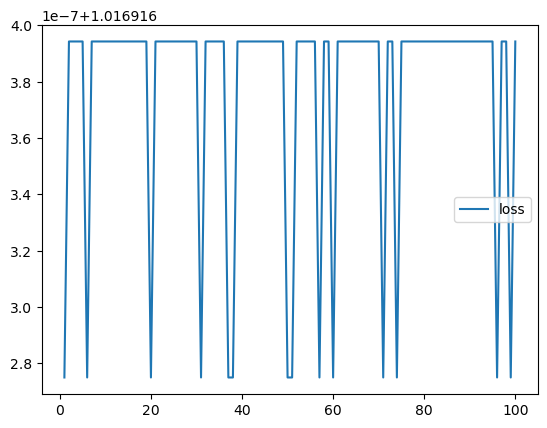

In [21]:
# Plot the loss
df.plot(y="loss")

In [22]:
model_history = model.history#.history
model_history.keys()

dict_keys(['loss', 'mse'])

<Axes: >

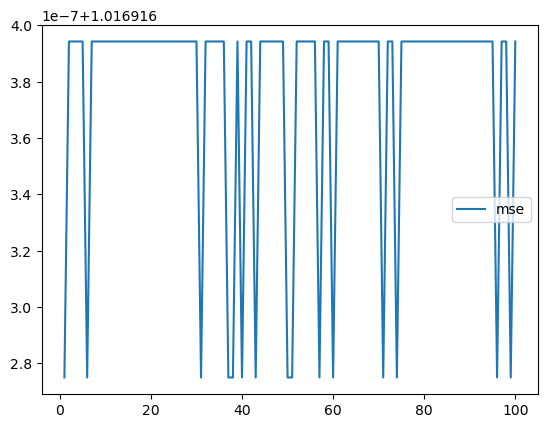

In [23]:
# Plot the mse
df.plot(y="mse")

In [24]:
# Evaluate the model using testing data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test_scaled, verbose=2)

# Display evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 1.3984 - mse: 1.3984 - 285ms/epoch - 95ms/step
Loss: 1.3984458446502686, Accuracy: 1.3984458446502686


In [25]:
yhat_train = neuron.predict(X_train)
yhat_test = neuron.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [26]:
# yhat_train

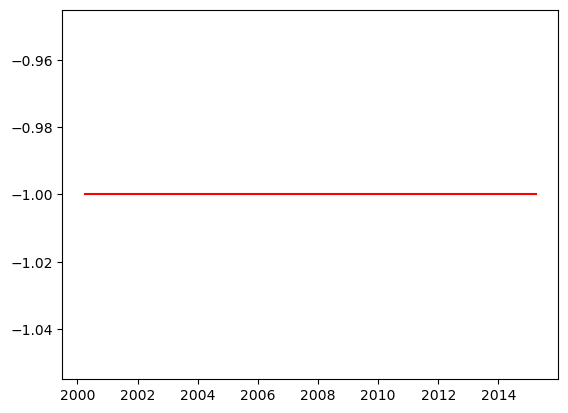

In [27]:
import matplotlib.pyplot as plt

# plt.plot(dates_train, yhat_train)
# plt.plot(dates_test, yhat_test)
# plt.plot(dates_test, y_test)

plt.plot(X_train.index,yhat_train, 'r-')
# plt.plot(y_test.index, yhat_test, 'b-')
# plt.plot(y_test.index, y_test, 'g-')
# plt.plot(y_test.index, y_test, 'g-')

# plt.plot(X_train.index,y_train, 'k-')

In [28]:
type(y_test)

pandas.core.frame.DataFrame

In [29]:
y_test

,S&P/ASX 200(TR)m
date,
2015-03-31,-0.000602
2015-04-30,-0.017036
2015-05-31,0.003994
2015-06-30,-0.053048
2015-07-31,0.044020
...,...
2022-02-28,0.021445
2022-03-31,0.068850
2022-04-30,-0.008539


In [30]:
y

,S&P/ASX 200(TR)m
date,
2000-03-31,0.008289
2000-04-30,-0.005238
2000-05-31,-0.009834
2000-06-30,0.080072
2000-07-31,-0.018057
...,...
2022-02-28,0.021445
2022-03-31,0.068850
2022-04-30,-0.008539
